# GLM - Linear Regression - Sklearn & Statsmodel

### Motivation
- Remove correlations
- Train and test linear regression with sklearn
- Evaluation metrics: MAE, R2, RMSE
- Understand regression coefficients
- Visualize the results
- Train and test linear regression with Statsmodel
- Regression diagnostics

In [2]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np

get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
# About the database
# http://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [4]:
# Load database
import os

os.chdir("C:\\Users\\enzoa\\OMNP\\PY\\Base de Dados")

wine = pd.read_csv("winequality-red.csv", sep = ";")

wine.shape

(1599, 12)

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


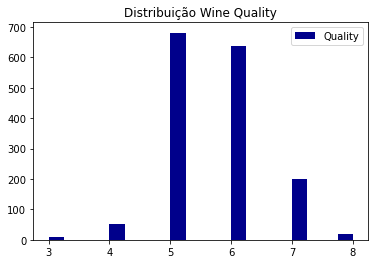

In [8]:
# Histogram
plt.hist(wine["quality"], bins = 20
        , histtype = "stepfilled"
        , color = "darkblue"
        , edgecolor = "none"
        , label = "Quality");

plt.legend()
plt.title("Distribuição Wine Quality");

#There is no normal distribution here

----------------------------

## Remove Correlations

In [10]:
# Marking the correlation of the variables with our target
correl = wine.corr()['quality'].drop('quality')

correl

# The higher, the better the chance of the independent variable being a good predictor of my target

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

<AxesSubplot:>

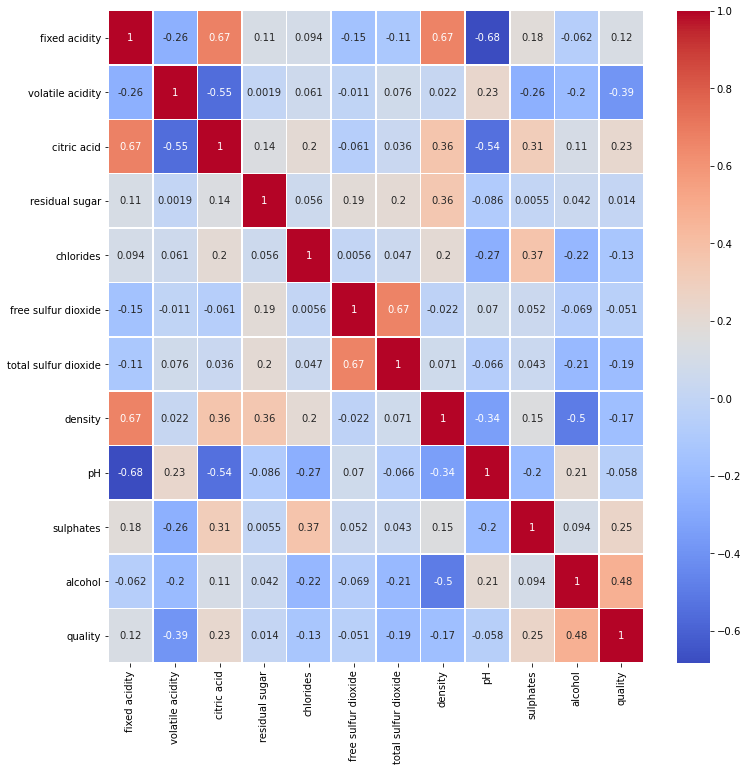

In [11]:
# Visualize the correlations
correl_hm = wine.corr()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(correl_hm, cmap = "coolwarm", annot = True, linewidths = .6, ax = ax)

In [12]:
# Remove the correlations and rewrite the dataframe
correl_total = wine.corr().abs()

superior = correl_total.where(np.triu(np.ones(correl_total.shape), k = 1).astype(np.bool))
var_remove = [variaveis for variaveis in superior.columns if any(superior[variaveis] > 0.5)]

wine = wine.drop(wine[var_remove], axis = 1)

<ipython-input-12-cc9eb3c517ff>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  superior = correl_total.where(np.triu(np.ones(correl_total.shape), k = 1).astype(np.bool))


In [13]:
wine.shape

(1599, 8)

--------------------------------------

## Brief analysis of the outliers

In [16]:
wine.describe()

# Look at the min and max for each variable and then look at the quartiles. Example "free sulfur dioxide" and "residual sugar

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,2.538806,0.087467,15.874922,0.658149,10.422983,5.636023
std,1.741096,0.179060,1.409928,0.047065,10.460157,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.900000,0.012000,1.000000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,1.900000,0.070000,7.000000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,2.200000,0.079000,14.000000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,2.600000,0.090000,21.000000,0.730000,11.100000,6.000000
max,15.900000,1.580000,15.500000,0.611000,72.000000,2.000000,14.900000,8.000000


## Train and test the linear regression with Sklearn

In [17]:
# Split the data into variables x and the target y
x = wine.drop('quality', axis = 1)
y = wine['quality']

In [19]:
# Split the data between training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [20]:
# Train the model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [21]:
# Predictions for the training and the test
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

--------------------------

## Evaluation metrics: MAE, R2, RMSE

In [22]:
# Evaluate the results
import sklearn.metrics as metrics
from math import sqrt

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
R2_train = metrics.r2_score(y_train, y_pred_train)
RMSE_train = sqrt(metrics.mean_squared_error(y_train, y_pred_train))

print("----- Avaliação do treinamento -----")
print("MAE:", round(MAE_train,2))
print("R2:", round(R2_train,2))
print("RMSE:", round(RMSE_train,2))

MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
R2_test = metrics.r2_score(y_test, y_pred_test)
RMSE_test = sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print("----- Avaliação do teste -----")
print("MAE:", round(MAE_test,2))
print("R2:", round(R2_test,2))
print("RMSE:", round(RMSE_test,2))

----- Avaliação do treinamento -----
MAE: 0.53
R2: 0.32
RMSE: 0.68
----- Avaliação do teste -----
MAE: 0.5
R2: 0.37
RMSE: 0.63


In [23]:
# Look only to the test

print("A qualidade média do vinho da base é: ")
print(round(y_test.mean(), 2))
print()
print("O percentual do MAE em relação a média base é: ")
print(round(MAE_test/y_test.mean()*100, 2))

A qualidade média do vinho da base é: 
5.64

O percentual do MAE em relação a média base é: 
8.79


In [24]:
# Below 10% is reasonable

--------------------------

## Understanding Regression Coefficients

In [25]:
# Show the regression coefficients (weights)
coef = pd.DataFrame(lr.coef_, wine.columns[0:7])
coef.columns = ['Coeficientes']

print(coef)

                     Coeficientes
fixed acidity            0.026524
volatile acidity        -1.189626
residual sugar          -0.007879
chlorides               -2.387639
free sulfur dioxide     -0.000703
sulphates                0.724511
alcohol                  0.288063


In [26]:
# And the constant (intercept)
lr.intercept_

2.7858481561759336

----------------------------------

### My regression formula is:

lr = 2.7858481561759336 + 0.026524 x fixed acidity + -1.189626 x volatile acidity + -0.007879 x residual sugar + -2.387639 x chlorides + -0.000703 x free sulfur dioxide + 0.724511 x sulphates + 0.288063 x alcohol

In [27]:
wine.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,11.0,0.56,9.4,5
1,7.8,0.88,2.6,0.098,25.0,0.68,9.8,5
2,7.8,0.76,2.3,0.092,15.0,0.65,9.8,5
3,11.2,0.28,1.9,0.075,17.0,0.58,9.8,6
4,7.4,0.70,1.9,0.076,11.0,0.56,9.4,5


In [30]:
# Predict only a single record - observation 0

lr.predict([[7.4, 0.70, 1.9, 0.076, 11.0, 0.56, 9.4]])

# I can "play" with the coefficients and observe the change in the quality of the wine according to my formula

array([5.05873965])

-------------------------

## Visualize the results

In [31]:
# Real VS Predicted results in the dataframe
resultados = pd.DataFrame({'Real':y_test, 'Previsto':y_pred_test})

resultados

,Real,Previsto
21,5,5.558539
799,6,5.671713
453,7,6.205425
1146,6,5.407862
1182,6,6.017399
...,...,...
401,6,5.964052
765,6,5.111303
1199,6,5.246465
1104,6,6.274295


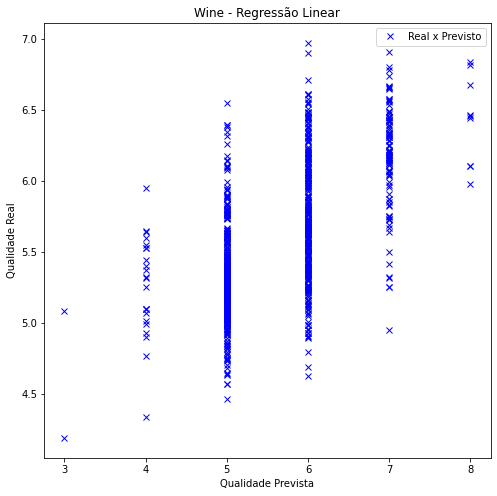

In [34]:
# Graph of the results
plt.figure(figsize = (8,8))
plt.plot(y_test, y_pred_test, "x", color = "blue", label = "Real x Previsto")
plt.legend()
plt.xlabel("Qualidade Prevista")
plt.ylabel("Qualidade Real")
plt.title("Wine - Regressão Linear");

In [35]:
# This graph justifies the low R2 since it has too much dispersion
# Ideally, you should see a continuous line in the graph
# So there is room to improve the model eventually

---------------------------------

## Train and Test the linear regression with Statsmodels

In [36]:
# pip install statsmodels

In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [40]:
# Train the model with statsmodels

# Important note: by default statsmodels does not add the constant (intercept)
# You must add it manually
x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)

lr_sm = sm.OLS(y_train, x_train_).fit()

y_pred_train_sm = lr_sm.predict(x_train_)

y_pred_test_sm = lr_sm.predict(x_test_)

# Print out the statistics
lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     52.77
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           8.32e-62
Time:                        12:33:01   Log-Likelihood:                -826.74
No. Observations:                 799   AIC:                             1669.
Df Residuals:                     791   BIC:                             1707.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.7858      0.344      8.091      0.000       2.110       3.462
fixed acidity           0.0265      0.015      1.754      0.080      -0.003       0.056
volatile acidity       -1.1896      0.150     -7.944      0.000      -1.484      -0.896
residual sugar         -0.0079      0.016     -0.499      0.618      -0.039       0.023
chlorides              -2.3876      0.670     -3.561      0.000      -3.704      -1.072
free sulfur dioxide    -0.0007      0.002     -0.294      0.769      -0.005       0.004
sulphates               0.7245      0.157      4.612      0.000       0.416       1.033
alcohol                 0.2881      0.025     11.719      0.000       0.240       0.336
==============================================================================
Omnibus:                       17.994   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.787
Skew:                          -0.230   Prob(JB):                     4.14e-06
Kurtosis:                       3.730   Cond. No.                         633.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# P-value <= 0.05 (if higher, I can take it out of my regression)
# Jarque-Bera (JB) must be close to 0, otherwise my residuals do not tend to normality (heteroskedasticity)

In [43]:
# Evaluate of results with statsmodels
import statsmodels.api

MAE_train_sm = statsmodels.tools.eval_measures.meanabs(y_train, y_pred_train)
R2_train_sm = lr_sm.rsquared
RMSE_train_sm = statsmodels.tools.eval_measures.rmse(y_train, y_pred_train)

print("----- Avaliaçao do treinamento -----")
print("MAE: ", round(MAE_train_sm,2))
print('R2: ', round(R2_train_sm,2))
print('RMSE: ', round(RMSE_train_sm,2))

MAE_test_sm = statsmodels.tools.eval_measures.meanabs(y_test, y_pred_test) 
RMSE_test_sm = statsmodels.tools.eval_measures.rmse(y_test, y_pred_test)

print("")
print("----- Avaliaçao do teste -----")
print("MAE: ", round(MAE_test_sm,2))
print('RMSE: ', round(RMSE_test_sm,2))

----- Avaliaçao do treinamento -----
MAE:  0.53
R2:  0.32
RMSE:  0.68

----- Avaliaçao do teste -----
MAE:  0.5
RMSE:  0.63


In [44]:
# Show regression weights

print(lr_sm.params)

const                  2.785848
fixed acidity          0.026524
volatile acidity      -1.189626
residual sugar        -0.007879
chlorides             -2.387639
free sulfur dioxide   -0.000703
sulphates              0.724511
alcohol                0.288063
dtype: float64


-----------------------------

## Regression Diagnosis

In [45]:
lr_sm.resid

890    -0.695626
768     0.780292
166    -0.287687
400     0.079000
115     0.200936
          ...   
863    -0.199567
251     0.582744
1137   -0.066649
248     0.666045
1546   -0.474002
Length: 799, dtype: float64

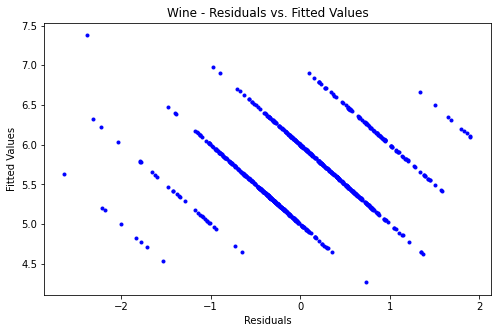

In [46]:
# Residuals vs. Fitted Values

plt.figure(figsize = (8,5))
plt.plot(lr_sm.resid, y_pred_train_sm, ".", color = "blue")
plt.xlabel("Residuals")
plt.ylabel("Fitted Values")
plt.title("Wine - Residuals vs. Fitted Values");

# So...
# 1) You can see that we do have an outlier problem in this database
# 2) Clearly, looking at the different inter-group variances, it is plausible to say that 
    # Linear regression is not the best model for this database
    # (even if all variables are continuous, and I have worked out the correlation). 
    # In this case, it might be better to use a Classification algorithm

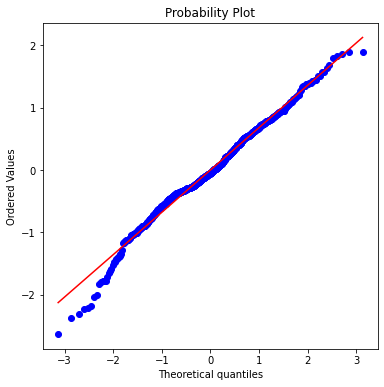

In [48]:
# Normality plot
import scipy as sp

fig, ax = plt.subplots(figsize=(6,6))

sp.stats.probplot(lr_sm.resid, plot = ax, fit = True);

# DIt should have a straight line... there is not the normality expected

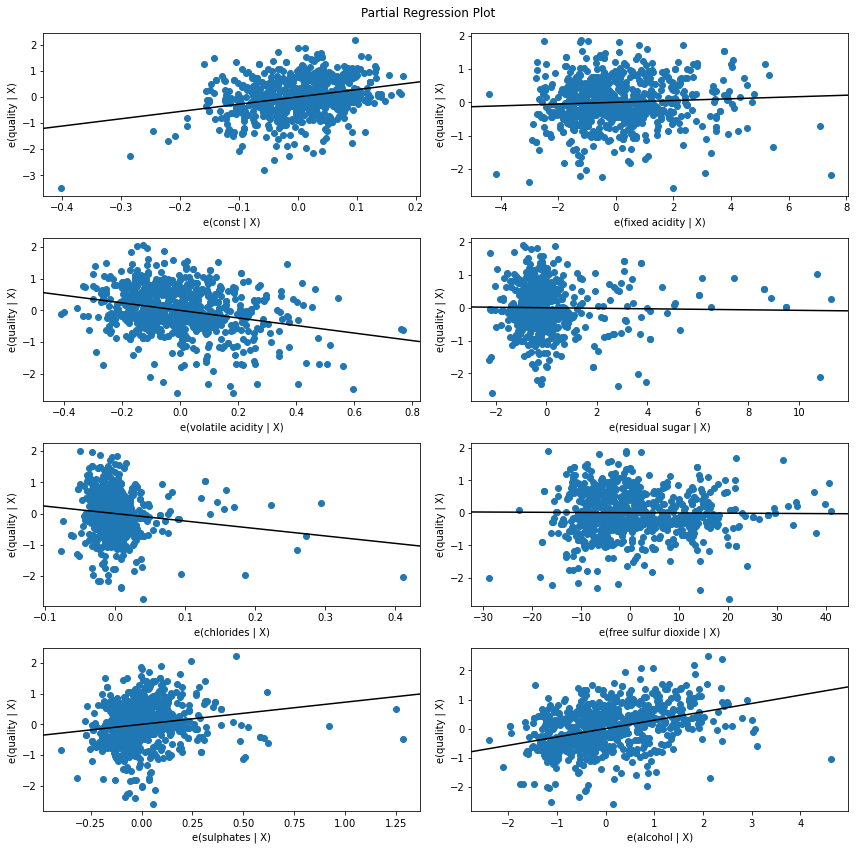

In [49]:
# Partial plot - I plot my target with each of the dependent variables of my model
fig = plt.figure(figsize=(12,12))

fig = sm.graphics.plot_partregress_grid(lr_sm, fig = fig)

# In this type of analysis, I try to remove variables that do not have a linear relationship with my target
# I can also see which variables bring outliers

In [50]:
# Retraining the model - keeping only what is "good"
wine2 = wine[["volatile acidity", "chlorides", "sulphates", "alcohol", "quality"]]

x = wine2.drop('quality', axis = 1)
y = wine2['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.50)

x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)

lr_sm2 = sm.OLS(y_train, x_train_).fit()

y_pred_train_sm = lr_sm2.predict(x_train_)

y_pred_test_sm = lr_sm2.predict(x_test_)

# Print out the statistics
lr_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     117.2
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           1.52e-78
Time:                        13:06:41   Log-Likelihood:                -794.61
No. Observations:                 799   AIC:                             1599.
Df Residuals:                     794   BIC:                             1623.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.6996      0.275      9.818      0.000       2.160       3.239
volatile acidity    -1.2795      0.139     -9.183      0.000      -1.553      -1.006
chlorides           -1.9900      0.581     -3.426      0.001      -3.130      -0.850
sulphates            0.9363      0.153      6.112      0.000       0.636       1.237
alcohol              0.3050      0.023     13.320      0.000       0.260       0.350
==============================================================================
Omnibus:                        8.503   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               11.449
Skew:                          -0.094   Prob(JB):                      0.00326
Kurtosis:                       3.556   Cond. No.                         268.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Look at the difference of Jarque-Bera(JB) with the previous model
# Look at my kurtosis and skewness with the previous model